# IoT·인공지능·빅데이터 개론 및 실습 (2021년도, 2학기, M2177.004900_001)


##9/10 Logistic Regerssion & Neural Network with Scikit-Learn

Adapted by Seonwoo Min from the "An Introduction to Machine Learning with Scikit-learn" tutorial (http://scikit-learn.org/stable/tutorial/basic/tutorial.html).

In this excercise, we will cover:

* Loading an example dataset & preprocessing
* Logistic regression & neural network models in scikit-learn
* Model training & prediction & evaluation
* Model save & load
* Homework

## 1. Loading an example dataset & preprocessing

In [23]:
from sklearn.datasets import load_digits
data = load_digits()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


Data:  (1797, 64)
Label: (1797,)
[0 1 2 3 4 5 6 7 8 9] [178 182 177 183 181 182 181 179 174 180]


<BarContainer object of 10 artists>

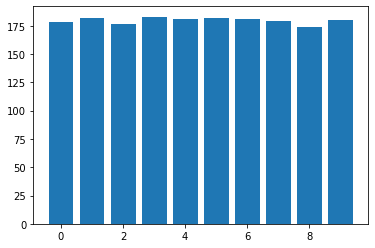

In [2]:
# Data shape & statistics
print("Data: ", data['data'].shape)
print("Label:", data['target'].shape)

# Print the number of samples for each class
import numpy as np
import matplotlib.pyplot as plt
#################### To Do #################################
vals, cnt = np.unique(data['target'], return_counts=True)
print(vals, cnt)
plt.bar(vals, cnt)
############################################################

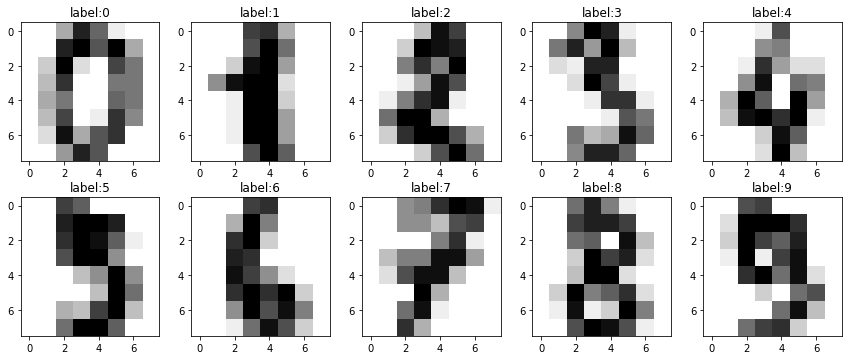

In [3]:
#############################################################
# Data Visaulization
#############################################################
import matplotlib.pyplot as plt
%matplotlib inline

#################### To Do #################################
# Hint: plt.imshow(data['data'][i].reshape(8,8), cmap=plt.cm.gray_r)

fig, axes = plt.subplots(2,5, figsize=(12,5))
num = 0
for i in range(2):
    for j in range(5):
        ax = axes[i][j]
        ax.imshow(data['data'][num].reshape(8,8), cmap=plt.cm.gray_r)
        ax.set_title("label:"+str(num))
        num += 1
        
plt.tight_layout()
############################################################

In [4]:
#############################################################
# 1st Preprocessing
# Use the first 20 samples in each clss as test data
# Use the others as training data
#############################################################

#################### To Do #################################
test_data = data['data'][:20]
train_data = data['data'][20:]
############################################################

print(test_data.shape)
print(train_data.shape)

(20, 64)
(1777, 64)


In [15]:
#############################################################
# 2nd Preprocessing
# Let's use only 2 and 3 for binary classification
#############################################################

data23 = data['data'][(data['target']==2)|(data['target']==3)]
target23 = data['target'][(data['target']==2)|(data['target']==3)]
print(data23.shape)
print(target23.shape)

#################### To Do #################################
test_data23 = data23[:20]
train_data23 = data23[20:]

test_target23 = target23[:20]
train_target23 = target23[20:]
############################################################

print(test_data23.shape)
print(train_data23.shape)

print(test_target23.shape)
print(train_target23.shape)

(360, 64)
(360,)
(20, 64)
(340, 64)
(20,)
(340,)


## 2. Logistic regression & neural network models in scikit-learn

For full documentations refer to the following links: <br>
Logistic Regression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
Neural network: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

LR = LogisticRegression(max_iter=1000, solver='sag')
NN = MLPClassifier(hidden_layer_sizes=(10), activation='relu', learning_rate_init=0.01, max_iter=1000)

## 3. Model training & prediction & evaluation

In [17]:
from sklearn.metrics import accuracy_score

#############################################################
# Logistic regression model
#############################################################
# Training
LR = LogisticRegression(max_iter=1, solver='sag')
LR.fit(train_data23, train_target23)

# Prediction
train_predict23 = LR.predict(train_data23)
test_predict23 = LR.predict(test_data23)
print("test_target     :", test_target23)
print("test_prediction :", test_predict23)

#################### To Do #################################
train_acc23 = accuracy_score(train_target23, train_predict23)
test_acc23 = accuracy_score(test_target23, test_predict23)
############################################################

print("train_acc :", train_acc23)
print("test_acc  :", test_acc23)

test_target     : [2 3 2 3 2 3 3 2 2 2 2 3 3 3 3 2 2 3 2 3]
test_prediction : [2 3 2 3 2 3 3 2 2 2 2 3 3 3 3 2 2 3 2 3]
train_acc : 0.9911764705882353
test_acc  : 1.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [18]:
#############################################################
# Neural network model
#############################################################

#################### To Do #################################
NN.fit(train_data23, train_target23)

train_pred = NN.predict(train_data23)
test_pred = NN.predict(test_data23)

train_acc = accuracy_score(train_target23, train_pred)
test_acc = accuracy_score(test_target23, test_pred)

print(train_acc, test_acc)
############################################################


1.0 1.0


## 4. Model save & load

In [24]:
# from sklearn.externals import joblib
import joblib
import os

if not os.path.exists('models'):
    os.makedirs('models')
    
# save
joblib.dump(NN, 'models/NN23.joblib') 

# load
NN_load = joblib.load('models/NN23.joblib') 

#################### To Do #################################
# NN_load.score(train_data23, train_target23)
NN_load.score(data['data'], data['target'])
############################################################

0.2003338898163606

## 5. Homework
Now it's your job to experiment with models and achieve higher accuracy on the  **<font color=red>on the entire dataset</font>**. <br>
Try different hyperparameter configurations and save the final model as "final_model.joblib" <br>
Submit the current **notebook file and the saved final model** on ETL.
* Maximum 10 points for >= 97% accuracy on the test set
* Maximum 8 points for >= 96% accuracy on the test set
* Maximum 6 points for >= 95% accuracy on the test set
* Maximum 4 points for >= 94% accuracy on the test set

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### 1) load data

```
df = pd.DataFrame(X, columns = digits.feature_names)
df['target'] = y
df = df.astype('int')
df
```

In [40]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
print(X.shape, y.shape)

(1797, 64) (1797,)


### 2) split train-test datasets

In [42]:
X_test = X[:100]
y_test = y[:100]

X_train = X[100:]
y_train = y[100:]

print(X_train.shape, X_test.shape)
print(np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True))

(1697, 64) (100, 64)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([167, 170, 167, 171, 173, 173, 170, 169, 166, 171])) (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([11, 12, 10, 12,  8,  9, 11, 10,  8,  9]))


### 3) fit model 

In [83]:
NN = MLPClassifier(hidden_layer_sizes=(20,20,20,10), activation='relu', learning_rate_init=0.01, max_iter=1000)
NN.fit(X_train, y_train)
y_pred = NN.predict(X_test)

print(NN.score(X_test, y_test))
print(accuracy_score(y_test, y_pred))

0.88
0.88


In [55]:
#############################################################
# Try different hyperparameters
# Final model training
#############################################################

#################### To Do #################################
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import time

start = time.time()  # 시작 시간 저장

clf = MLPClassifier()
gs = GridSearchCV(clf, param_grid={'hidden_layer_sizes': [10,20],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.01],
              'alpha': [0.01],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]})

gs.fit(X_train, y_train)
print(gs.best_params_)
print(time.time()-start)
############################################################

{'activation': 'relu', 'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'adam', 'warm_start': False}
2.288106918334961


In [ ]:
#############################################################
# Final model test
# Load the final model and obatin the test accuracy
#############################################################

#################### To Do #################################

############################################################


### Describe what you did here
In this cell you should also write an explanation of what you did, any additional features that you implemented, and any visualizations or graphs that you make in the process of training and evaluating your model.
* Maximum 10 points

작성자 학번, 성함 (**반드시 작성해주세요**)

학번: 

이름: 

_Tell us here_